# 1. Data Understanding

## 1.2. Mempersiapkan Dataset

In [1]:
#Mengunduh Datasat
!wget https://github.com/jodyirawan/Proyek-Sistem-Rekomendasi/raw/main/Dataset_Movie_recommendation.zip

--2021-11-16 07:45:34--  https://github.com/jodyirawan/Proyek-Sistem-Rekomendasi/raw/main/Dataset_Movie_recommendation.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jodyirawan/Proyek-Sistem-Rekomendasi/main/Dataset_Movie_recommendation.zip [following]
--2021-11-16 07:45:35--  https://raw.githubusercontent.com/jodyirawan/Proyek-Sistem-Rekomendasi/main/Dataset_Movie_recommendation.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866276 (846K) [application/zip]
Saving to: ‘Dataset_Movie_recommendation.zip’

Dataset_Movie_recom 100%[===================>] 845.97K  --.-KB/s    in 0.03s   

20

In [2]:
#ekstrak dataset
!unzip /content/Dataset_Movie_recommendation.zip

Archive:  /content/Dataset_Movie_recommendation.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [3]:
# Import modul pandas untuk membaca dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
movies = pd.read_csv('/content/movies.csv')
rating = pd.read_csv('/content/ratings.csv')

# Cek jumlah data yang akan digunakan
print('Jumlah judul film pada dataset: ', len(movies.movieId.unique()))
print('Jumlah rating yang diberikan: ', len(rating.movieId.unique()))

Jumlah judul film pada dataset:  9742
Jumlah rating yang diberikan:  9724


# 2. Eksplorasi Data

## 2.1 movies Variabel

In [4]:
#melihat info variable movie
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
genres=movies['genres'].str.get_dummies(sep='|')
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
movies=pd.merge(movies, genres, left_index=True, right_index=True)
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
movies.drop(['genres'], axis = 1,inplace=True) 
movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.2 rating Variabel

In [8]:
#melihat info variable rating
rating.info()
rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
#Memuat deskripsi setiap kolom dataframe
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
#drop kolom yang tidak digunakan
rating.drop(['timestamp'], axis = 1,inplace=True) 

In [11]:
#cek jumlah data yang digunakan
print('Jumlah userId: ', len(rating.userId.unique()))
print('Jumlah movieId: ', len(rating.movieId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userId:  610
Jumlah movieId:  9724
Jumlah data rating:  100836


# 3. Data Preprocessing

## 3.1 Menggabungkan movie

In [12]:
import numpy as np
 
# Menggabungkan seluruh movieId pada kategori movies
movies_all = np.concatenate((
    movies.movieId.unique(),
    rating.movieId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
movies_all = np.sort(np.unique(movies_all))
 
print('Jumlah seluruh data movie berdasarkan userId: ', len(movies_all))

Jumlah seluruh data movie berdasarkan userId:  9742


In [13]:
movies.info()
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   title               9742 non-null   object
 2   (no genres listed)  9742 non-null   int64 
 3   Action              9742 non-null   int64 
 4   Adventure           9742 non-null   int64 
 5   Animation           9742 non-null   int64 
 6   Children            9742 non-null   int64 
 7   Comedy              9742 non-null   int64 
 8   Crime               9742 non-null   int64 
 9   Documentary         9742 non-null   int64 
 10  Drama               9742 non-null   int64 
 11  Fantasy             9742 non-null   int64 
 12  Film-Noir           9742 non-null   int64 
 13  Horror              9742 non-null   int64 
 14  IMAX                9742 non-null   int64 
 15  Musical             9742 non-null   int64 
 16  Mystery             9742

## 3.2 Menggabungkan dataframe rating dengan movie

In [14]:
# Menggabungkan dataframe rating dengan movie berdasarkan nilai movieId
movies_one = pd.merge(rating, movies , on='movieId', how='left')
movies_one

,userId,movieId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,Heat (1995),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
100832,610,168248,5.0,John Wick: Chapter Two (2017),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100833,610,168250,5.0,Get Out (2017),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,Logan (2017),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
# Cek missing value dengan fungsi isnull()
movies_one.isnull().sum()

userId                0
movieId               0
rating                0
title                 0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [16]:
# Mengecek berapa jumlah movies_one
len(movies_one.movieId.unique())

9724

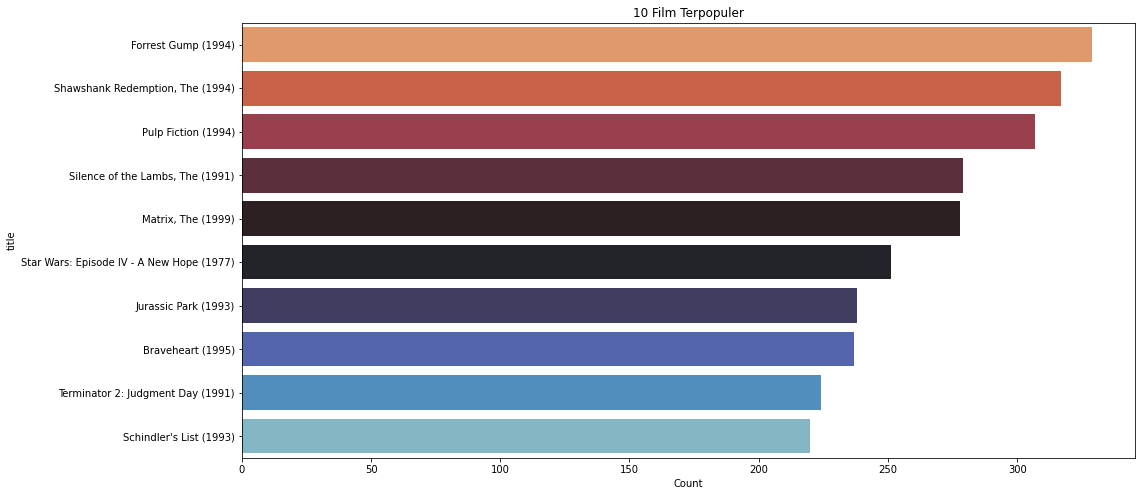

In [17]:
title = movies_one.title.value_counts().reset_index()
title.columns = ['title','count']

plt.figure(figsize = (16,8))
plt.title("10 Film Terpopuler")
sns.barplot(x = 'count', y = 'title', data = title.head(10), palette='icefire_r');
plt.ylabel('title')
plt.xlabel('Count')
plt.show()

# 4. Data Preparation

In [18]:
# # Mengecek judul film yang unik
movies_one.title.unique()

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)', ...,
       'Hazard (2005)', 'Blair Witch (2016)', '31 (2016)'], dtype=object)

## 4.1 Tahap Persiapan

In [19]:
# Membuat variabel preparation yang berisi dataframe movies_one kemudian mengurutkan berdasarkan movieId
preparation = movies_one
preparation = preparation.sort_values('movieId')

In [20]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42115,288,2,2.0,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
43169,289,3,2.5,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
38179,262,4,1.0,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
77224,483,5,2.5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27256,184,193581,4.0,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27257,184,193583,3.5,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27258,184,193585,3.5,Flint (2017),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
27259,184,193587,3.5,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4.2 konversi data series menjadi list

In [21]:
# Mengonversi data series ‘Name’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
print(len(movie_id))
print(len(movie_name))

9724
9724


## 4.3 membuat dictionary untuk menentukan pasangan key-value

In [22]:
# Membuat dictionary untuk data ‘movie_id’ dan ‘movie_name’
movies_new = pd.DataFrame({
    'id': movie_id,
    'movies_name': movie_name
})
movies_new

,id,movies_name
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017)
9720,193583,No Game No Life: Zero (2017)
9721,193585,Flint (2017)
9722,193587,Bungo Stray Dogs: Dead Apple (2018)


# 5. Model Development dengan Collaborative Filtering

## 5.1. import library yang dibutuhkan

In [23]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

## 5.2. membaca dan memahami dataset

In [24]:
# Membaca dataset
 
df = rating
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## 5.3. menyandikan (encode) fitur ‘user’ dan ‘movieId’ ke dalam indeks integer

In [25]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [26]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [27]:
# petakan userID dan movieId ke dataframe yang berkaitan

# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

## 5.4. cek data dan mengubah nilai rating menjadi float

In [28]:


# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## 5.5 Membagi Data untuk Training dan Validasi dengan komposisi 80:20

In [29]:
# Mengacak dataset agar distribusinya menjadi random
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


In [30]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


# 6. Proses Training

## 6.1. melakukan proses embedding

In [31]:
# melakukan proses embedding terhadap data user dan movie
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

## 6.2. proses compile terhadap model

In [32]:
# proses compile terhadap model
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## 6.3 proses training

In [33]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10084/10084 [==============================] - 60s 6ms/step - loss: 0.6263 - root_mean_squared_error: 0.2220 - val_loss: 0.6131 - val_root_mean_squared_error: 0.2065
Epoch 2/100
10084/10084 [==============================] - 57s 6ms/step - loss: 0.6047 - root_mean_squared_error: 0.1983 - val_loss: 0.6090 - val_root_mean_squared_error: 0.2019
Epoch 3/100
10084/10084 [==============================] - 56s 6ms/step - loss: 0.6000 - root_mean_squared_error: 0.1929 - val_loss: 0.6081 - val_root_mean_squared_error: 0.2006
Epoch 4/100
10084/10084 [==============================] - 55s 5ms/step - loss: 0.5972 - root_mean_squared_error: 0.1896 - val_loss: 0.6071 - val_root_mean_squared_error: 0.1993
Epoch 5/100
10084/10084 [==============================] - 54s 5ms/step - loss: 0.5960 - root_mean_squared_error: 0.1880 - val_loss: 0.6068 - val_root_mean_squared_error: 0.1989
Epoch 6/100
10084/10084 [==============================] - 55s 5ms/step - loss: 0.5946 - root_mean_squared_err

## 6.4. Visualisasi Metrik

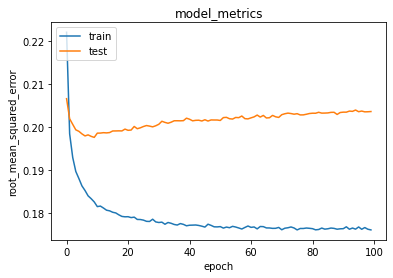

In [34]:
# Plot metrik evaluasi dengan matplotlib
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6.5. Mendapatkan Rekomendasi film

In [35]:
# membuat daftar film untuk direkomendasikan pada pengguna.
movies_df = movies_new
df = pd.read_csv('ratings.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movies_df[~movies_df['id'].isin(movie_visited_by_user.movieId.values)]['id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [36]:
# memperoleh rekomendasi film
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movies_df[movies_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movies_name)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movies_df[movies_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movies_name)

Showing recommendations for users: 164
movie with high ratings from user
--------------------------------
Braveheart (1995)
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Gladiator (2000)
Man with the Golden Gun, The (1974)
Guns of Navarone, The (1961)
--------------------------------
Top 10 movie recommendation
--------------------------------
Heidi Fleiss: Hollywood Madam (1995)
Paths of Glory (1957)
Butcher Boy, The (1997)
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976)
Stunt Man, The (1980)
Belle époque (1992)
Trial, The (Procès, Le) (1962)
Adam's Rib (1949)
Enter the Void (2009)
Band of Brothers (2001)
